In [91]:
from keras.models import Sequential # type: ignore
from keras.layers import Dense , Dropout , Flatten , Conv2D , MaxPooling2D # type: ignore
from keras.optimizers import Adam  # type: ignore
import tensorflow as tf # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
import numpy as np # type: ignore
import pandas as pd # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from tensorflow.keras.losses import SparseCategoricalCrossentropy # type: ignore
import matplotlib.pyplot as plt # type: ignore
import random





random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [92]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")


In [93]:
train_data.shape

(42000, 785)

In [94]:
x_train= train_data.astype('float32')
y_train= train_data['label'].astype('int32')
x_train.drop('label' , axis = 1, inplace=True)
x_test = test_data.astype('float32')
x_train = x_train.values.reshape(-1, 28,28,1)
x_test = x_test.values.reshape(-1, 28,28,1)



In [95]:
x_train.shape # ...,1) is for the  conv layer

(42000, 28, 28, 1)

In [96]:
x_test.shape

(28000, 28, 28, 1)

1


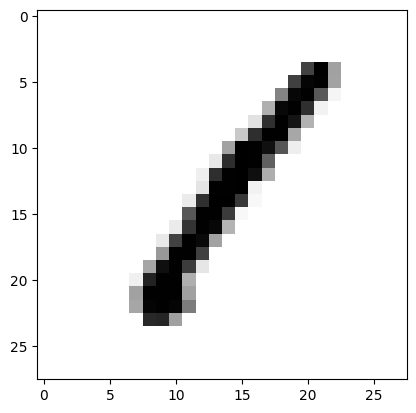

In [97]:
plt.imshow(x_train[0] , cmap = plt.cm.binary)
print(y_train[0])
plt.show()

# Normalize the data [0,1]

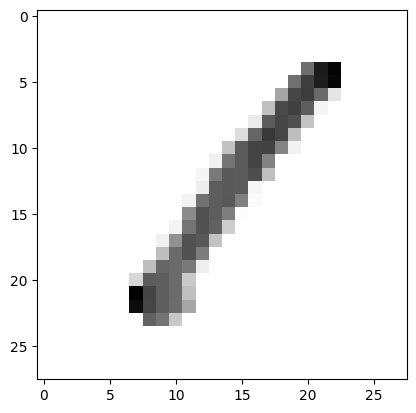

In [98]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
plt.imshow(x_train[0] , cmap = plt.cm.binary)


# Model Creation

In [99]:
model = Sequential( [ Conv2D(64 , (3,3) , activation = 'relu' , input_shape = x_train.shape[1:]),   # 64 is the number of filters and (3,3) is the kernel size (martix size for filter)  , input_shape = x_train.shape[1:] is the shape of the input data (28,28,1) one image 
       MaxPooling2D(pool_size=(2, 2)) , #  to get the  max of 2x2 matrix
       
       Conv2D(64 , (3,3) , activation = 'relu' , input_shape = x_train.shape[1:]),   # 64 is the number of filters and (3,3) is the kernel size (martix size for filter)  , input_shape = x_train.shape[1:] is the shape of the input data (28,28,1) one image 
       MaxPooling2D(pool_size=(2, 2)) ,
       
       Dropout(0.5) , # to prevent overfitting
       Conv2D(64 , (3,3) , activation = 'relu' , input_shape = x_train.shape[1:]),   # 64 is the number of filters and (3,3) is the kernel size (martix size for filter)  , input_shape = x_train.shape[1:] is the shape of the input data (28,28,1) one image 
       MaxPooling2D(pool_size=(2, 2)) ,
       Dropout(0.2) , # to prevent overfitting

       Flatten() , 
       Dense(128 , activation = 'relu') ,
       Dense(64 , activation = 'relu') ,
       Dense(32 , activation = 'relu') ,
       Dense(10 , activation = 'softmax')]
)

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [100]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,482 (365.16 KB)

 Trainable params: 93,482 (365.16 KB)

 Non-trainable params: 0 (0.00 B)

In [101]:
model.compile(optimizer = Adam(learning_rate=0.0007) , loss=SparseCategoricalCrossentropy() , metrics = ['accuracy'])

In [102]:
model.fit(x_train , y_train , epochs = 90 , validation_split=0.2) # 20% of the data will be used for validation

Epoch 1/90
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5888 - loss: 1.1808 - val_accuracy: 0.9436 - val_loss: 0.1887
Epoch 2/90
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9195 - loss: 0.2619 - val_accuracy: 0.9688 - val_loss: 0.1079
Epoch 3/90
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9409 - loss: 0.1909 - val_accuracy: 0.9730 - val_loss: 0.0874
Epoch 4/90
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.9517 - loss: 0.1568 - val_accuracy: 0.9731 - val_loss: 0.0810
Epoch 5/90
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.9584 - loss: 0.1353 - val_accuracy: 0.9789 - val_loss: 0.0720
Epoch 6/90
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9614 - loss: 0.1240 - val_accuracy: 0.9802 - val_loss: 0.0647
Epoch 7/90
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.9630 - loss: 0.1191 - val_accuracy: 0.9839 - val_loss: 0.0556
Epoch 8/90
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.9673 - l

In [103]:
y_pred = model.predict(x_test)
sub_data = np.argmax(y_pred, axis=1)
print(sub_data)

submission = pd.DataFrame({'ImageId': range(1, len(sub_data) + 1), 'Label': sub_data})
submission.to_csv('submission_cnn.csv', index=False)

875/875 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step
[2 0 9 ... 3 9 2]
